In [1]:
# load the pretrained model from model/model.safetensors
# and use it to predict the output of the test data
# load the model and tokenizer
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('models/RoBERTA-9ep/result/model')
tokenizer = RobertaTokenizer.from_pretrained('models/RoBERTA-9ep/result/tokenizer')


In [2]:
# load the test data
import pandas as pd
test_data = pd.read_csv('data/Testing_db.csv')

In [3]:
# preprocess the test data
X_test = test_data['Transcript']
y_test = test_data['Category']

In [4]:
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)


In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from scipy.special import softmax

# Convert the test encodings into PyTorch tensors
input_ids = torch.tensor(test_encodings['input_ids'])
attention_mask = torch.tensor(test_encodings['attention_mask'])

# Create a DataLoader for the test data (for batching)
test_dataset = TensorDataset(input_ids, attention_mask)
test_loader = DataLoader(test_dataset, batch_size=8)

# Move model to evaluation mode
model.eval()

# Initialize a list to store the predictions
predictions = []

# Disable gradient calculation for inference (saves memory and computations)
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask = batch
        # Predict the output logits
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        # Convert logits to probabilities
        probs = softmax(logits.numpy(), axis=1)
        # Determine the predicted category for each example in the batch
        predicted_categories = probs.argmax(axis=1)
        predictions.extend(predicted_categories)

# At this point, `predictions` contains the predicted category index for each test example.
# If you have a mapping of category indices to category names, you can convert these indices to actual names.


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

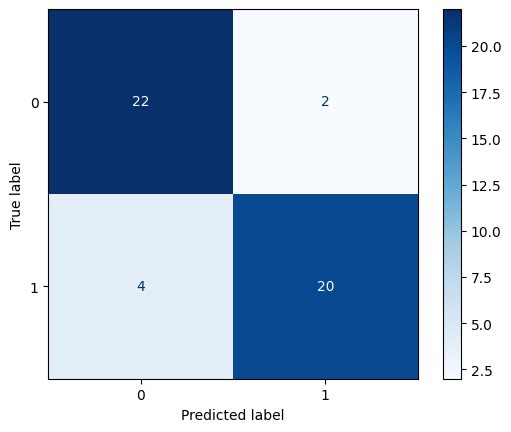

In [8]:
# Get true labels from the test dataset

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [9]:
# Calculate the accuracy
accuracy = np.mean(y_test == predictions)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8750
